In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab

# Introdução

## Explicação do dataset

O banco de dados escolhido para a análise é o 'League of Legends Diamond Ranked Games (10 min)', que é uma base que contém informações de aproximadamente 10 mil partidas ranqueados do top 1,5% jogadores (jogadores classificados entre os ranques Diamante e Mestre) do jogo League of Legends.

O League of Legends é um jogo online onde 10 jogadores jogam simultâneamente dividido entre 2 times de 5 jogadores. Cada jogador dentro do jogo possui uma função específica e o objetivo é destruir o Nexus do time adversário, que pode ser alcançado a partir da destruição das torres de cada uma das 3 rotas do jogo. Cada rota possui 3 torres e o Nexus é defendido por mais 2 torres. Os jogadores devem defender as torres de sua rota e destruir a torre dos adversários, enquanto acumulam ouro que pode ser utilizado para comprar equipamentos para fortalece-los e experiência que pode aumentar o nível de cada jogador.

 A análise a ser realizada verificará se certos conceitos, partindo de uma tese central, se relacionam entre si ou não. Um exemplo a ser dado seria a relação entre a diferença de ouro e abates obtidos pelo time azul, em que é esperado que ambas variáveis tenham uma relação proporcional entre elas.

O dataset possui 18 atributos para cada time (sendo 36 ao total) dos dados de cada time até os 10 minutos da partida. Desse modo, resolvemos escolher os seguintes atributos:

- __blueWardsPlaced__ (Sentinelas posicionadas pelo time Azul)
  - As sentinelas são itens que um jogador pode utilizar para revelar a área próximo de onde é posicionada ao seu time e desse modo é utilizada para tomadas de decisões significativas e prevenir ser emboscado pelo time inimigo em uma situação desvantajosa que irá favorecer o time inimigo.

- __blueKills__ (Abates realizados pelo time Azul)
  - Os abates realizados por um time dão ouro adicional ao time que realizou o abate e permitindo que comprem equipamentos melhores e aumentem seu poder no jogo e o jogador que foi abatido fica fora do jogo por um período de tempo, impedindo que ele colete ouro por esse tempo, enfraquecendo esse jogador consequentemente.

- __blueDeaths__ (Mortes do time Azul)
  - Semelhante aos abates, as mortes contém o aspecto negativo do seu jogador ficar temporariamente fora do jogo sem poder coletar ouro enquanto o jogador que o abateu recebe ouro extra de recompensa por esse abate, além de continuar coletando o ouro de outros modos no jogo.

- __blueElitblueEliteMonsters__ (Monstros Épicos derrotado pelo time Azul)
  - Monstros que possuem muita vida e são mais difíceis de ser abatidos por possuirem muita vida e dano. O time que abate esses monstros ganham uma grande vantagem em ouro e experiência.

- __blueGoldDiff__ (Diferença de ouro do time Azul)
  - A diferença de ouro pode ser utilizada como parâmetro para facilitar o entendimento da vantagem de um time em comparação ao outro. O time com uma vantagem de ouro em geral consegue comprar mais equipamentos e consequentemente obtém mais poder no jogo do que o time inimigo.



## Definição do problema


In [24]:
url_lol = 'https://raw.githubusercontent.com/michellyrds/mqaa/master/datasets/high_diamond_ranked_10min.csv'

url = url_lol
raw_data = pd.read_csv(url)

df = raw_data.filter(['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueGoldDiff'], axis=1)

In [3]:
df_csv = df.to_csv(r'/home/michelly/df.csv', index=False, header=True)

**Pré-processamento do Dataset**

Identificando dados faltantes

In [4]:
df.isna().sum()

blueWardsPlaced      0
blueKills            0
blueDeaths           0
blueEliteMonsters    0
blueGoldDiff         0
dtype: int64

Normalizando dados

In [5]:
normalized_df = (df-df.mean()) /df.std()
normalized_df.head(10)

,blueWardsPlaced,blueKills,blueDeaths,blueEliteMonsters,blueGoldDiff
0,0.316980,0.935254,-0.046924,-0.879186,0.256215
1,-0.570963,-0.393196,-0.387777,-0.879186,-1.191194
2,-0.404474,0.271029,1.657340,0.719467,-0.483590
3,1.149426,-0.725309,-0.387777,0.719467,-0.544323
4,2.925312,-0.061084,-0.046924,-0.879186,-0.415112
5,-0.237985,-0.393196,-1.069482,0.719467,0.278634
6,-0.237985,0.271029,-0.046924,0.719467,0.976863
7,-0.348978,-0.393196,2.339046,-0.879186,-1.071765
8,-0.348978,0.271029,0.293929,-0.879186,-0.812528
9,-0.515467,-0.725309,-0.387777,0.719467,-0.636849


## Medidas de tendência central

In [7]:
## Média
df.mean()

blueWardsPlaced      22.288288
blueKills             6.183925
blueDeaths            6.137666
blueEliteMonsters     0.549954
blueGoldDiff         14.414111
dtype: float64

In [8]:
## Moda
df.mode()

,blueWardsPlaced,blueKills,blueDeaths,blueEliteMonsters,blueGoldDiff
0,16,6,5,0,428


In [9]:
## Mediana
df.median()

blueWardsPlaced      16.0
blueKills             6.0
blueDeaths            6.0
blueEliteMonsters     0.0
blueGoldDiff         14.0
dtype: float64

## Histograma (das variáveis escolhidas)

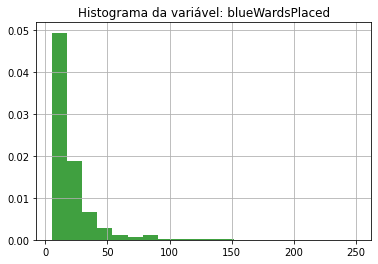

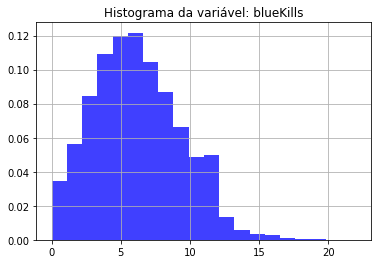

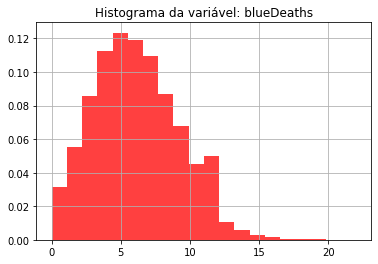

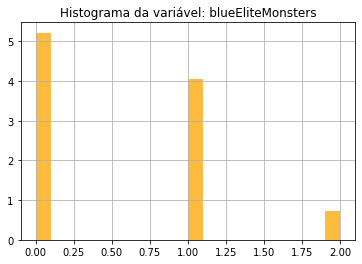

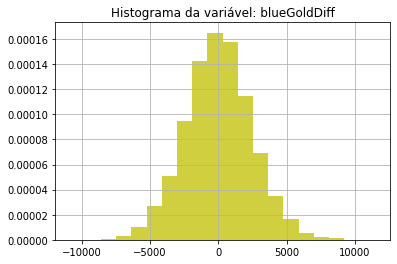

In [10]:
plt.title("Histograma da variável: blueWardsPlaced")

n, bins, patches = plt.hist(df['blueWardsPlaced'], 20, density=True, facecolor='g', alpha=0.75);
plt.grid(True)
plt.show()

print("")
plt.title("Histograma da variável: blueKills")

n, bins, patches = plt.hist(df['blueKills'], 20, density=True, facecolor='b', alpha=0.75);
plt.grid(True)
plt.show()

print("")
plt.title("Histograma da variável: blueDeaths")

n, bins, patches = plt.hist(df['blueDeaths'], 20, density=True, facecolor='r', alpha=0.75);
plt.grid(True)
plt.show()

print("")
plt.title("Histograma da variável: blueEliteMonsters")

n, bins, patches = plt.hist(df['blueEliteMonsters'], 20, density=True, facecolor='orange', alpha=0.75);
plt.grid(True)
plt.show()

print("")
plt.title("Histograma da variável: blueGoldDiff")

n, bins, patches = plt.hist(df['blueGoldDiff'], 20, density=True, facecolor='y', alpha=0.75);
plt.grid(True)
plt.show()

## Medidas de variabilidade

In [26]:
## Variância

df.var()

blueWardsPlaced      3.246907e+02
blueKills            9.066289e+00
blueDeaths           8.607286e+00
blueEliteMonsters    3.912834e-01
blueGoldDiff         6.018922e+06
dtype: float64

In [27]:
## Desvio Padrão

df.mad()

blueWardsPlaced        10.504574
blueKills               2.399956
blueDeaths              2.342013
blueEliteMonsters       0.574059
blueGoldDiff         1931.562328
dtype: float64

## Avaliação de normalidade

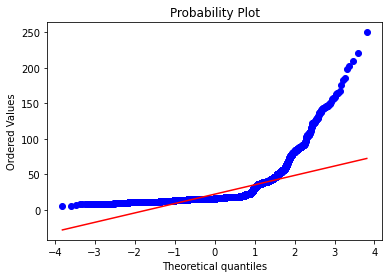

In [28]:
df_wards_placed = df.filter(['blueWardsPlaced'])
df_wards_placed = df_wards_placed.to_numpy()
df_wards_placed = np.reshape(df_wards_placed, (len(df_wards_placed),))
st.probplot(df_wards_placed, dist='norm', plot=pylab)
pylab.show()

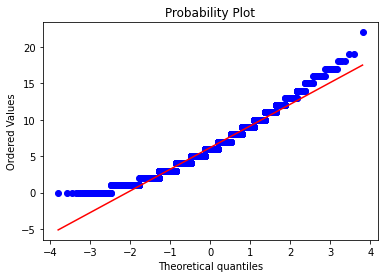

In [29]:
df_blue_kills = df.filter(['blueKills'])
df_blue_kills = df_blue_kills.to_numpy()
df_blue_kills = np.reshape(df_blue_kills, (len(df_blue_kills),))
st.probplot(df_blue_kills, dist='norm', plot=pylab)
pylab.show()


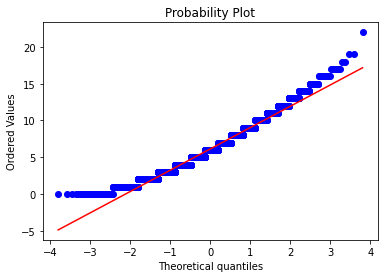

In [30]:
df_blue_deaths = df.filter(['blueDeaths'])
df_blue_deaths = df_blue_deaths.to_numpy()
df_blue_deaths = np.reshape(df_blue_deaths, (len(df_blue_deaths),))
st.probplot(df_blue_deaths, dist='norm', plot=pylab)
pylab.show()

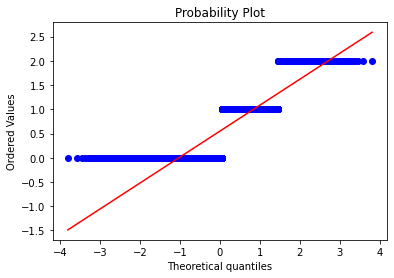

In [31]:
df_elite_monsters = df.filter(['blueEliteMonsters'])
df_elite_monsters = df_elite_monsters.to_numpy()
df_elite_monsters = np.reshape(df_elite_monsters, (len(df_elite_monsters),))
st.probplot(df_elite_monsters, dist='norm', plot=pylab)
pylab.show()

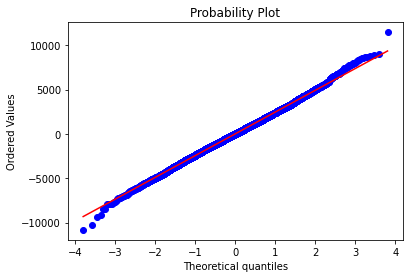

In [32]:
df_gold_diff = df.filter(['blueGoldDiff'])
df_gold_diff = df_gold_diff.to_numpy()
df_gold_diff = np.reshape(df_gold_diff, (len(df_gold_diff),))
st.probplot(df_gold_diff, dist='norm', plot=pylab)
pylab.show()

### Teste de D'Agostino-Pearson

In [33]:
stat, p = st.normaltest(df['blueWardsPlaced'])
print('stat=%.3f, p=%3f\n'%(stat,p))
if p > 0.05:
    print("Distribuição Gaussiana")
else:
    print("Distribuição não-Gaussiana")

stat=8521.829, p=0.000000

Distribuição não-Gaussiana


In [34]:
stat, p = st.normaltest(df['blueKills'])
print('stat=%.3f, p=%3f\n'%(stat,p))
if p > 0.05:
    print("Distribuição Gaussiana")
else:
    print("Distribuição não-Gaussiana")

stat=444.260, p=0.000000

Distribuição não-Gaussiana


In [35]:
stat, p = st.normaltest(df['blueDeaths'])
print('stat=%.3f, p=%3f\n'%(stat,p))
if p > 0.05:
    print("Distribuição Gaussiana")
else:
    print("Distribuição não-Gaussiana")

stat=394.739, p=0.000000

Distribuição não-Gaussiana


In [36]:
stat, p = st.normaltest(df['blueEliteMonsters'])
print('stat=%.3f, p=%3f\n'%(stat,p))
if p > 0.05:
    print("Distribuição Gaussiana")
else:
    print("Distribuição não-Gaussiana")

stat=843.014, p=0.000000

Distribuição não-Gaussiana


In [37]:
stat, p = st.normaltest(df['blueGoldDiff'])
print('stat=%.3f, p=%3f\n'%(stat,p))
if p > 0.05:
    print("Distribuição Gaussiana")
else:
    print("Distribuição não-Gaussiana")

stat=29.912, p=0.000000

Distribuição não-Gaussiana


## Medidas separatrizes

<AxesSubplot:>

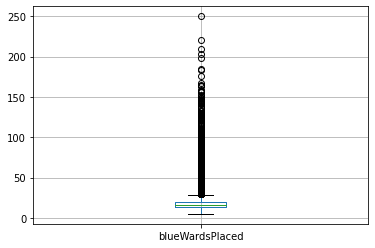

In [38]:
df.boxplot(['blueWardsPlaced'])

<AxesSubplot:>

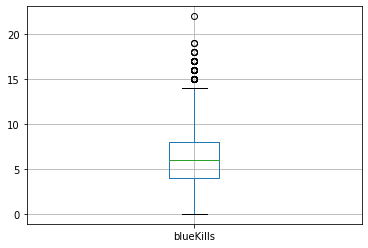

In [39]:
df.boxplot(['blueKills'])

<AxesSubplot:>

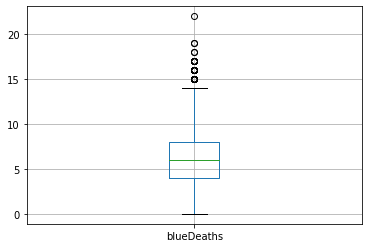

In [40]:
df.boxplot(['blueDeaths'])

<AxesSubplot:>

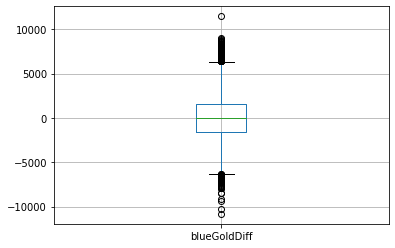

In [41]:
df.boxplot(['blueGoldDiff'])

<AxesSubplot:>

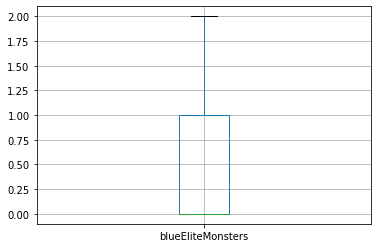

In [42]:
df.boxplot(['blueEliteMonsters'])